## Universidad Autonoma de Aguascalientes
## Departamento de Ciencias de la Computación
## Carrera: Ingenieria en Computación Inteligente
## Materia: Meta - Heuristicas I
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Diego Alberto Aranda Gonzalez
## Semestre: Agosto-Diciembre 2024

### Practica No. 10. La busqueda local es una técnica para resolver problemas de optimización donde la solución óptima se busca moviendose iterativamente entre soluciones vecinas en el espacio de busqueda.
El recocido simulado es un algoritmo de optimización inspirado en el proceso de recocido en metalurgía, donde un material se calienta y luego se enfria lentamente para disminuir sus efectos y alcanzar un estado mínimo de energía. En esta practica implementaremos el algoritmo Recocido Simulado para buscar el optimo global de una función en 2D: f(x)=x^2 y la graficamos.

#### Paso 1: Importar Librerias necesarias

In [142]:
import math
import random
import matplotlib.pyplot as plt

#### Paso 2: Definimos la función objetivo (x^2)

In [143]:
def objective_function(x):
  return x**2

#### Paso 3: Definir la función para generar la vecindad

In [144]:
def neighbor_solution(x):
  return x + random.uniform(-1, 1) # Genera un vecion aleatorio cerca de x

#### Paso 4: Definir la función del Recocido Simulado

In [145]:
def simulate_annealing(initial_solution, initial_temperature, alpha, iterations):
  #Inicializamos la solución actual y la mejor solución
  current_solution = initial_solution
  best_solution = initial_solution
  current_temperature = initial_temperature

  for i in range(iterations):
    #Generamos un nuevo vecino
    new_solution = neighbor_solution(current_solution)
    #Calculamos el costo de la solución actual y la nueva 
    current_cost = objective_function(current_solution)
    new_cost = objective_function(new_solution)

    #Si la nueva solución es mejor que la actual, la aceptamos
    if new_cost < current_cost:
      current_solution = new_solution
      #Si la nueva solución es mejor que la mejor solución, la actualizamos
      if new_cost < objective_function(best_solution):
        best_solution = new_solution
    else:
      #Si la nueva solucion es peor, la aceptamos con cierta probabilidad
      probability = math.exp((current_cost - new_cost) / current_temperature)
      if random.random() < probability:
        current_solution = new_solution

    #Disminuimos la temperatura
    current_temperature *= alpha

    #Imprimimos el progreso
    print(f"Iteracion {i + 1}, Solucion Actual: {current_solution}, Mejor Solucion: {best_solution}")

  return best_solution

#### Paso 5: Parametros del algoritmo 

In [146]:
initial_solution = 10
initial_temperature = 100
alpha = 0.9
iterations = 100

#### Paso 6: Ejecutar el algoritmo de Recocido Simulado

In [147]:
best = simulate_annealing(initial_solution, initial_temperature, alpha, iterations)
print(f"La mejor solucion encontrada es {best:.4f}")

Iteracion 1, Solucion Actual: 9.610295134123145, Mejor Solucion: 9.610295134123145
Iteracion 2, Solucion Actual: 9.939804911397232, Mejor Solucion: 9.610295134123145
Iteracion 3, Solucion Actual: 10.272372722242379, Mejor Solucion: 9.610295134123145
Iteracion 4, Solucion Actual: 10.927931834815343, Mejor Solucion: 9.610295134123145
Iteracion 5, Solucion Actual: 10.927931834815343, Mejor Solucion: 9.610295134123145
Iteracion 6, Solucion Actual: 10.862376274053265, Mejor Solucion: 9.610295134123145
Iteracion 7, Solucion Actual: 10.753329112169585, Mejor Solucion: 9.610295134123145
Iteracion 8, Solucion Actual: 9.95148185313083, Mejor Solucion: 9.610295134123145
Iteracion 9, Solucion Actual: 10.300880604286409, Mejor Solucion: 9.610295134123145
Iteracion 10, Solucion Actual: 10.419113478777199, Mejor Solucion: 9.610295134123145
Iteracion 11, Solucion Actual: 10.764002527609696, Mejor Solucion: 9.610295134123145
Iteracion 12, Solucion Actual: 10.073771283239207, Mejor Solucion: 9.610295134

#### Paso 7: Graficar el algoritmo de Recocido Simulado

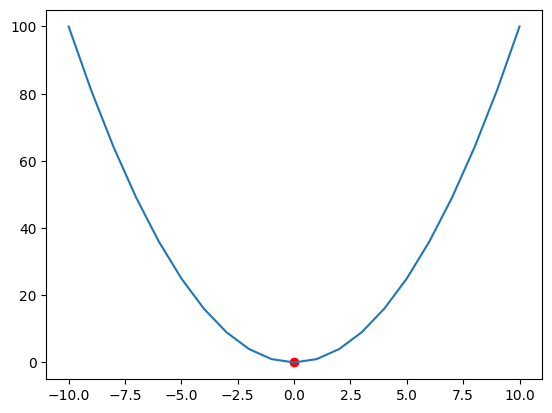

In [148]:
plt.figure()
x = range(-10, 11)
y = [objective_function(i) for i in x]
plt.plot(x, y)
plt.scatter(best, objective_function(best), color='red')
plt.show()
